<a href="https://colab.research.google.com/github/EricSiq/Natural_Language_Processing/blob/main/NLPLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Libraries

In [ ]:
!pip install emoji contractions -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 12.4 MB/s eta 0:00:00


Install Supporting Libraries

In [ ]:
import nltk
import pandas as pd
import re
import string
import numpy as np
import emoji
import contractions
nltk.download('all')
from bs4 import BeautifulSoup
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

In [ ]:
#Download and Transform Data

splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df_train = pd.read_parquet("hf://datasets/wangrongsheng/ag_news/" + splits["train"])
df_test = pd.read_parquet("hf://datasets/wangrongsheng/ag_news/" + splits["test"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


<BarContainer object of 4 artists>

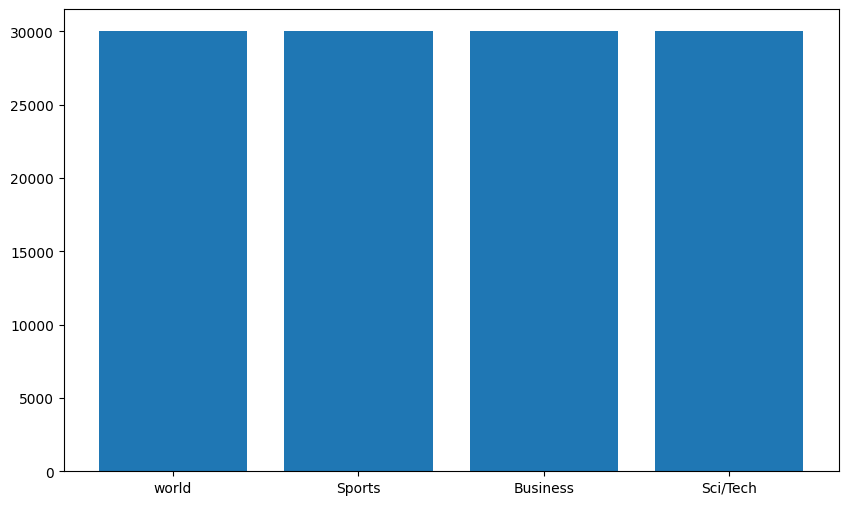

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(['world','Sports','Business','Sci/Tech'],df_train['label'].value_counts().values)


In [ ]:
def clean_text(text):
    text=text.translate(str.maketrans('','',string.punctuation)) # remove punctuations
    text = text.lower() #lowercase
    text = re.sub(r'http\S+|www\S+|https\S+','',text) #Remove URLs
    text = contractions.fix(text) #Fix I've would've etc.
    text = BeautifulSoup(text, "html.parser").text #Remove HTML tags
    text = re.sub(r'\d+', '', text) #Remove numbers
    text = ' '.join(text.split()) #Remove whitespace
    #Remove Stopwords
    stopwrd=set(stopwords.words('english'))
    text=' '.join([word for word in text.split() if word not in stopwrd])
    text = emoji.demojize(text) #Convert emojis to text
    return text

In [ ]:
df_train.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultimodalNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

ImportError: cannot import name 'MultimodalNB' from 'sklearn.naive_bayes' (/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py)

In [14]:
X_train, y_train =df_train['clean_text'], df_train['label']
X_test, y_test = df_test['clean_text'], df_test['label']

KeyError: 'clean_text'

In [ ]:
#define hyperparameter grid
param_grid=[
    {
        'vectorizer':[TfidVectorizer()],
        'classification': [RandomForestClassifier()]
        'vectorizer__ngram_range': [(1,2)]
        'classifier__kernel' : ['linear','']
        'classifier__C' : [1,10]
    }
]

In [16]:
#GridSearch & Train
grid = GridSearchCV(pipeline,param_grid,cv=2,verbose=3)
grid.fit(X_train,y_train)

NameError: name 'pipeline' is not defined